# Kick Starter Analysis 
Nicklaus Porter

---

# Index: 
Section 1: Background

Section 2: Data Cleaning and Feature Analysis 

Section 3: Exploratory Data Analysis 

Section 4: Comparing Predictive Models

Section 5: Logistic Regression Model

---

# Section 1: Background

---

Hi! My name is Nick. This is my first data project posted online. 
I obtained this dataset at Kaggle.com. The data seemed fun to work with as it shows the outcomes of kickstart projects. After looking at it I wanted to analyze and determine if we could predict a kick starter projects outcome. When I started with the data it had 378,661 projects. My idea for this project was to help Kickstarter projects become successful. I decided to drop projects that had empty values because there were only a few hundred of them and it would not significantly effect testing. I decided to just look at the U.S. dollar amount as it is the standard in my home country and it contained the most information. When I was picking this data set I knew I would be able to make great predictive models and really pretty visuals. The date ranges are from 2009-2017. I used the start and end date in order to calculate campaign duration. I also used the goal and pledged amount to calculate the total missed amount.I really enjoyed this project and hope you enjoy it as well.  

---

# Section 2: Data Cleaning and Feature Engineering

---

### 2.1: Packages and Data Import

---

In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime
import time
date_format = "%m/%d/%Y"
data = pd.read_csv("ks-projects-201801.csv")

###  2.2: Initial Cleaning

---

2.2.1: This is my initial renaming of columns, filling empty pledge amounts to 0 and dropping Projects with missing data. I dropped these projects because there were only a few hundred of them. 

2.2.2: Changed the type of the categorial data to a Category.

In [2]:
#2.2.1
data.columns = ['ID','Name', 'Category', 'Main_Category', 'Currency', 'Deadline','Goal', 'Launched', 'Pledged', 'State', 'Backers', 'Country','USD_Pledged', 'USD_Pledged_Real', 'USD_Goal_Real']
data.USD_Pledged = data.USD_Pledged.fillna(0)
data = data.dropna(how = 'any')

#2.2.2
data.Main_Category = data.Main_Category.astype('category')
data.Category = data.Category.astype('category')



---

### 2.3:  New Column Creation

---

2.3.1: I created a new column that showed the USD amount that projects were missed by. I also turned the negative data(Created by successful projects) to 0.

2.3.2: I converted the Launched and Deadline amounts to Datetime and Created a new column for the length of each campaign 

2.3.3: For this data I determined that if a project was canceled, suspeneded or not complete, I would determine it to be a failure. I also chose to exclude projects that are currently live.

In [3]:
#2.3.1
result = data.USD_Goal_Real - data.USD_Pledged_Real
data["Goal_Missed_AMT"] = result
num = data._get_numeric_data()
num[num < 0] = 0

#2.3.2
data['Launched'] = pd.to_datetime(data['Launched'])
data['Deadline'] = pd.to_datetime(data['Deadline'])
result1 = data['Deadline'] - data['Launched']
data['Campaign_Length_Days'] = result1
data['Campaign_Length_Days'] = [i.days for i in data['Campaign_Length_Days']]

#2.3.3
data["Outcome"] = data['State']
data["Outcome"] = data["Outcome"].replace('canceled', 'failed').replace('suspended', 'failed').replace('undefined','failed')
data = data[data.Outcome !='live']


### 2.4 Final Data Parameters

---

2.4.1: This is the list of columns I dropped. I already ahd a new pledged amount and determined the best way to view the data was in U.S. Dollars.

2.4.2: Setting a time range for my dataset. I decided to set the start and end date as such becuase there are only a few hundred projects outside these ranges. Some of the dates were 1970 and if the date was incorrect I didnt want to trust the rest of the data. 


In [4]:

#2.4.1
data = data.drop(["ID","Name","State","Goal","USD_Pledged","Pledged","Currency"], axis = 1)
data.columns = ['SubCategory','Category', 'Deadline','Launched_Date','Backers','Country','Pledged','Goal','Amount_Missed','Duration_Days','Outcome']
#2.4.2
start_date= pd.to_datetime('01-01-2009')
end_date = pd.to_datetime('01-01-2018')
data = data[(data['Launched_Date']>start_date) & (data['Deadline'] < end_date)] 


----

# Section 3: Exploratory Data Analysis

---

### 3.1: Introduction

---

In [30]:
#
print'We will be exploring', len(data.index), 'Kickstarter Projects!\nEach project has',len(data.columns), 'columns.\nThe columns are:', "%s" % (', '.join(data.columns)),'.\nThe first project in this set launched on', (data.Launched_Date.min().date()), "and the deadline for the last project was", (data.Deadline.max().date()),'.\nEach project can be sorted into 1 of',len(data.Category.unique()),'Categories.\nThe main',len(data.Category.unique()),'Categories are comprised of',len(data.SubCategory.unique()),'Sub-Categories.\nThere are',sum(data.Outcome=='successful'), "Successful Projects.\nThere are",sum(data.Outcome=='failed'),'Unsuccessful Projects',"\nThe number of projects with backers is",sum(data.Backers>0), "\nThe number of projects without backers is", sum(data.Backers==0)
# 



We will be exploring 375371 Kickstarter Projects!
Each project has 12 columns.
The columns are: SubCategory, Category, Deadline, Launched_Date, Backers, Country, Pledged, Goal, Amount_Missed, Duration_Days, Outcome, Year .
The first project in this set launched on 2009-04-21 and the deadline for the last project was 2017-12-31 .
Each project can be sorted into 1 of 15 Categories.
The main 15 Categories are comprised of 159 Sub-Categories.
There are 133870 Successful Projects.
There are 241501 Unsuccessful Projects 
The number of projects with backers is 320422 
The number of projects without backers is 54949


###  3.2: importing packages

---

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 3.3: Data Exploraton

---

In [7]:
df1 = data
df1['Year'] = df1['Launched_Date'].dt.year
df1.head()

,SubCategory,Category,Deadline,Launched_Date,Backers,Country,Pledged,Goal,Amount_Missed,Duration_Days,Outcome,Year
0,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,0,GB,0.0,1533.95,1533.95,58,failed,2015
1,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,15,US,2421.0,30000.00,27579.00,59,failed,2017
2,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,3,US,220.0,45000.00,44780.00,44,failed,2013
3,Music,Music,2012-04-16,2012-03-17 03:24:11,1,US,1.0,5000.00,4999.00,29,failed,2012
4,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,14,US,1283.0,19500.00,18217.00,55,failed,2015


In [8]:
print 'There were',sum(df1.Outcome=='successful'),'projects and',sum(df1.Outcome=='failed'), 'unsuccessful projects.'

There were 133870 projects and 241501 unsuccessful projects.


In [9]:
df1[['Goal','Pledged','Amount_Missed', 'Duration_Days', 'Backers']].mean()

Goal             45314.109410
Pledged           9089.947809
Amount_Missed    40967.297214
Duration_Days       33.156451
Backers            105.978227
dtype: float64

In [10]:
df1.groupby('Outcome')[['Goal','Pledged','Amount_Missed', 'Duration_Days', 'Backers']].mean()

,Goal,Pledged,Amount_Missed,Duration_Days,Backers
Outcome,,,,,
failed,65148.593142,1558.938352,63676.464766,34.265833,18.40033
successful,9532.771876,22675.861866,0.040374,31.155128,263.96844


In [11]:
df1.groupby(['Year','Outcome'])[['Goal','Pledged','Amount_Missed','Duration_Days', 'Backers']].mean()

Goal       Pledged  Amount_Missed  Duration_Days  \
Year Outcome                                                                
2009 failed       9714.225907    421.110760    9293.848480      62.770667   
     successful   3626.642193   4369.029430       0.000000      53.172712   
2010 failed      20008.863248    572.926443   19436.293370      49.092643   
     successful   4402.669068   5674.528820       0.000150      43.184193   
2011 failed      18622.723720    821.416416   17805.309954      42.324707   
     successful   5289.337170   7575.314426       0.000000      36.729110   
2012 failed      28798.998231   1546.630510   27262.619751      34.300632   
     successful   8494.079400  16010.497731       0.000017      30.969931   
2013 failed      40124.059909   2316.711616   37847.214532      32.661621   
     successful  10995.688904  21612.817378       0.000000      29.925470   
2014 failed      67787.903458   1611.705500   66249.484790      32.971482   
     successful  10091.499614  21295.500659       0.000000      29.858388   
2015 failed      97452.831877   1431.917431   96166.249039      33.500399   
     successful  11137.532161  28939.497227       0.251967      30.188022   
2016 failed      82991.687167   1648.817174   81469.489787      33.491605   
     successful  10657.287063  31631.866021       0.006390      30.016200   
2017 failed      59204.070416   1536.856601   57771.042195      32.656125   
     successful   9655.848740  30407.874180       0.000000      28.998694   

                    Backers  
Year Outcome                 
2009 failed        7.116000  
     successful   66.357513  
2010 failed        8.525481  
     successful   77.586109  
2011 failed       11.362673  
     successful  101.606442  
2012 failed       20.750118  
     successful  215.789012  
2013 failed       29.437058  
     successful  285.542467  
2014 failed       18.540675  
     successful  252.516985  
2015 failed       15.081983  
     successful  317.700873  
2016 failed       18.875023  
     successful  342.292710  
2017 failed       18.162075  
     successful  320.280747

In [12]:
df1.groupby(['Category','Outcome'])[['Goal','Pledged','Amount_Missed','Duration_Days', 'Backers']].mean()

Goal       Pledged  Amount_Missed  \
Category     Outcome                                                  
Art          failed       63887.050373    606.664164   63282.724397   
             successful    4411.767481   6974.563004       0.000057   
Comics       failed       36739.180270    985.646074   35759.018730   
             successful    5400.554365  11393.295210       0.000000   
Crafts       failed       12832.888799    365.217290   12483.091192   
             successful    3013.430794   5629.696889       0.000000   
Dance        failed       17876.666451    606.358538   17270.307913   
             successful    4603.151850   5195.512501       0.000000   
Design       failed       56736.055393   3410.480362   53608.801084   
             successful   15405.336224  62868.093223       0.011372   
Fashion      failed       26863.164801    962.479204   25921.993663   
             successful    9078.900459  20300.585451       0.000000   
Film & Video failed      122963.544680   1553.550754  121417.499493   
             successful   11146.293934  13953.517195       0.223752   
Food         failed       61739.026054   1069.045916   60688.183397   
             successful   11617.521260  17333.112604       0.000000   
Games        failed       62137.281073   2724.465094   59465.876058   
             successful   14858.339598  54232.765369       0.000000   
Journalism   failed      107919.249010    505.546187  107413.767821   
             successful    8174.584940  10378.739802       0.000000   
Music        failed       23686.482800    798.052072   22917.990292   
             successful    5732.792446   7330.857161       0.000000   
Photography  failed       14854.960804    654.510918   14204.916703   
             successful    6490.896736  10114.045250       0.000000   
Publishing   failed       33493.977016    614.744682   32880.355465   
             successful    5899.206055   9435.724044       0.000000   
Technology   failed      121875.014657   3304.149233  119050.155881   
             successful   26297.645929  93126.221154       0.000000   
Theater      failed       60290.101945   1040.263068   59250.041490   
             successful    5190.205529   5963.480871       0.000000   

                         Duration_Days     Backers  
Category     Outcome                                
Art          failed          33.156248    8.632723  
             successful      29.338666   90.378141  
Comics       failed          35.756900   20.881415  
             successful      30.902347  231.545828  
Crafts       failed          31.331669    6.145559  
             successful      28.026950   94.148463  
Dance        failed          34.150461    9.118524  
             successful      30.799572   63.437259  
Design       failed          33.945685   36.577011  
             successful      32.468892  614.749241  
Fashion      failed          32.285976   10.717744  
             successful      30.300663  217.137610  
Film & Video failed          35.992850   14.851209  
             successful      31.310116  152.580810  
Food         failed          33.847368   12.478593  
             successful      30.507733  180.397170  
Games        failed          32.969510   49.889261  
             successful      28.912839  814.441639  
Journalism   failed          34.209277    7.302859  
             successful      31.033730  152.785714  
Music        failed          35.720502    8.332896  
             successful      32.876908  102.078794  
Photography  failed          33.575990    9.034357  
             successful      31.138359  108.757190  
Publishing   failed          33.813485    9.728398  
             successful      31.011061  158.837576  
Technology   failed          34.675864   26.945478  
             successful      33.163738  717.947442  
Theater      failed          35.580273   11.921691  
             successful      30.615373   70.422753

### 3.4 Data Exploration Visuals

---

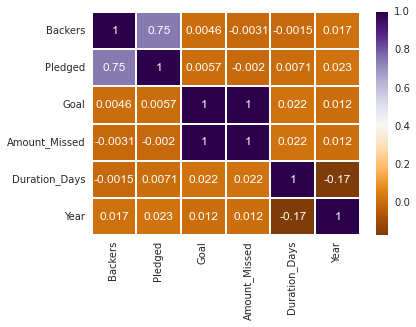

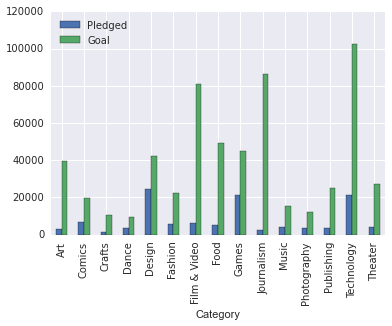

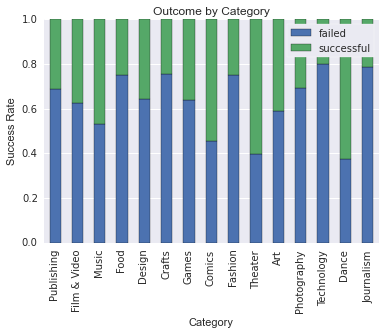

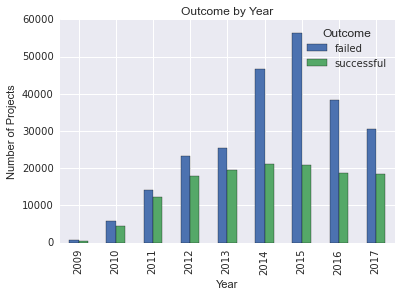

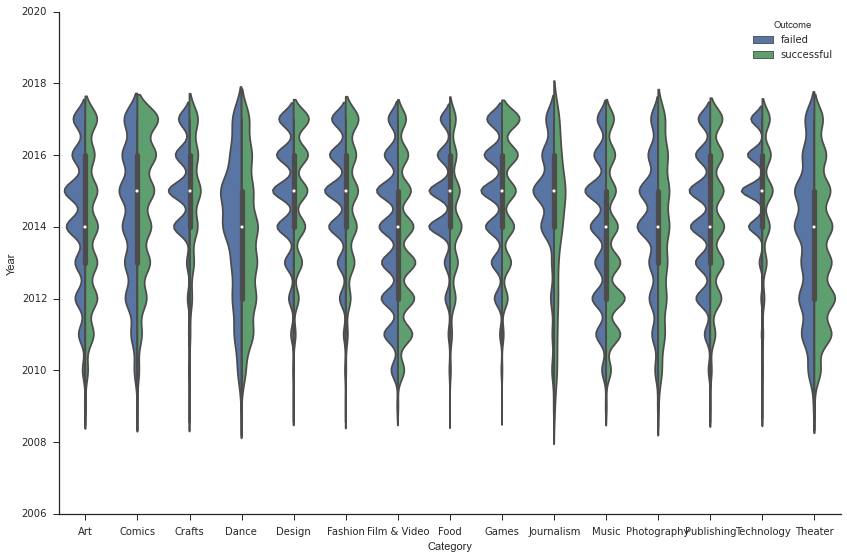

In [31]:
sns.set(style='darkgrid')
#Heatmap of correlation Matrix
corr_matrix=df1.corr()
table1=sns.heatmap(corr_matrix,annot=True, linewidth=.5,cmap='PuOr');
#Bar Graph Comparing Pledged/Goal
table4=pd.DataFrame(df1.groupby("Category")["Pledged","Goal"].mean()).reset_index().plot(kind='bar',x = 'Category');
#Stacked Percentage Bar Graph of Outcome by Category
table3=pd.crosstab(df1.Category,df1.Outcome)
table3.div(table3.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True),plt.title('Outcome by Category')\
,plt.xlabel('Category'),plt.ylabel('Success Rate'),plt.legend(loc = 'outside upper right', frameon=True)
#Records/Year
table5=pd.crosstab(df1.Year,df1.Outcome).plot(kind='Bar'),plt.title('Outcome by Year'),plt.ylabel('Number of Projects')
#Violin of Outcome by Category
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14,9)
sns.violinplot(y='Year', x='Category', hue='Outcome', data=data,split=True)
sns.despine()

---

# Section 4: Comparing Predictive Models

---

### 4.1: Importing tools

---

In [14]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 4.2: Dummy Variables

---

In [15]:
#Creating a new dataframe, creating dummy variables, then dropping unusable columns
df=data 
dummy_Category = pd.get_dummies(df['Category'],prefix='Category')
dummy_Country = pd.get_dummies(df['Country'],prefix='Country')
dummy_Outcome = pd.get_dummies(df['Outcome'],prefix='Outcome', drop_first = True)
df_new = pd.concat([df, dummy_Category, dummy_Country, dummy_Outcome], axis=1)
df_new = df_new.drop(["SubCategory",'Country','Category','Outcome','Amount_Missed', 'Backers', 'Pledged', 'Duration_Days','Year'], axis = 1)

#Converting Deadline and Launch date to ordinal
df_new['Deadline'] = pd.to_datetime(df_new['Deadline'])
df_new['Deadline']=df_new['Deadline'].map(dt.datetime.toordinal)
df_new['Launched_Date'] = pd.to_datetime(df_new['Launched_Date'])
df_new['Launched_Date']=df_new['Launched_Date'].map(dt.datetime.toordinal)

#Converted goal type to int.
df_new.Goal = df_new.Goal.astype(int)


### 4.3: Train/Test

---

In [16]:
#Created Train/Test
y = df_new.Outcome_successful
X = df_new.drop('Outcome_successful', 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(300296, 41) (300296,)
(75075, 41) (75075,)


### 4.4 Modeling 

---

Running a 10 fold cross validation analysis with Logistic Regression, Kneighbors, Decision Tree and Random Forest. This avoids overfitting while still producing a prediction.



LR: 0.643366 (0.002538)
KNN: 0.625016 (0.001610)
DT: 0.606120 (0.001519)
RF: 0.642916 (0.001315)


<function matplotlib.pyplot.show>

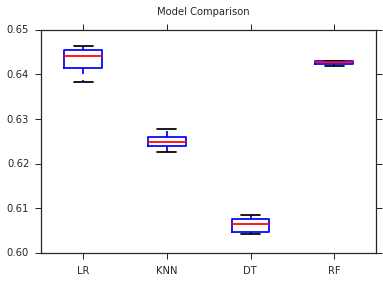

In [17]:
#Input random state
seed = 0 
#Organizing and selecting all models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
#Evaluation of each model ran
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#Comparing all models in a Box Chart
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show

---

# Section 5: Logistic Regression Model

---

### 5.1 Importing tools

---

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

### 5.2 Testing Logistic Regression Model

---

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
y_pred = logreg.predict(X_test)
print ('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.64


In [21]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[48131     0]
 [26944     0]]


We have 48,131 correct predicitons and 26,944 incorrect predictions

In [22]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.64      1.00      0.78     48131
          1       0.00      0.00      0.00     26944

avg / total       0.41      0.64      0.50     75075



The model has a good recall, but not so great precision.

### 5.3 ROC Curve

---

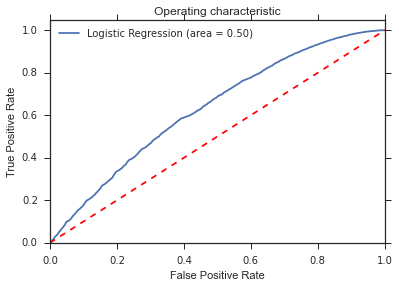

In [24]:
#Operating Characteristics of Model
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Operating characteristic')
plt.legend(loc="Upper right")
plt.show()